In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore, iqr, boxcox, chi2_contingency, normaltest, shapiro, ttest_1samp
from statsmodels.stats.weightstats import ztest
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# 1. Problem Statement
- Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years.
- Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. 
- For markets and society to function, individuals and companies need access to credit. 
- Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. 
- This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

## 2. Data Gathering

In [2]:
train_path = r"C:\Users\tradi\Downloads\Gsquare\cs-training.csv"
test_path = r"C:\Users\tradi\Downloads\Gsquare\cs-test.csv"

In [3]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

#### Take a quick overview of data

In [4]:
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
train_df.tail()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [6]:
train_df.shape

(150000, 12)

In [7]:
test_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [8]:
test_df.tail()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0
101502,101503,NaN,0.441842,29,0,0.198918,5916.0,12,0,0,0,0.0


In [9]:
test_df.shape

(101503, 12)

## 3. Exploratory Data Analysis
- Check info such as shape, size, axes, index, columns, info, describe, etc

#### Shape

In [10]:
train_df.shape

(150000, 12)

In [11]:
test_df.shape

(101503, 12)

#### Size

In [12]:
train_df.size

1800000

In [13]:
test_df.size

1218036

#### axes

In [14]:
train_df.axes

[RangeIndex(start=0, stop=150000, step=1),
 Index(['Unnamed: 0', 'SeriousDlqin2yrs',
        'RevolvingUtilizationOfUnsecuredLines', 'age',
        'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
        'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
        'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
        'NumberOfDependents'],
       dtype='object')]

#### columns

In [15]:
train_df.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [16]:
train_df.drop(["Unnamed: 0"], axis=1, inplace=True)
test_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [17]:
train_df.axes

[RangeIndex(start=0, stop=150000, step=1),
 Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
        'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
        'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
        'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
        'NumberOfDependents'],
       dtype='object')]

In [18]:
test_df.axes

[RangeIndex(start=0, stop=101503, step=1),
 Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
        'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
        'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
        'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
        'NumberOfDependents'],
       dtype='object')]

#### index

In [19]:
train_df.index

RangeIndex(start=0, stop=150000, step=1)

In [20]:
test_df.index

RangeIndex(start=0, stop=101503, step=1)

#### Check info(non-null count, data type)

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

#### describe

In [23]:
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [24]:
test_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


#### Check columnwise missing values

In [25]:
train_df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [26]:
test_df.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

#### Missing values imputation

###### `MonthlyIncome` imputation by mean

In [27]:
train_df['MonthlyIncome'].value_counts()

5000.0     2757
4000.0     2106
6000.0     1934
3000.0     1758
0.0        1634
           ... 
16084.0       1
10523.0       1
55250.0       1
9242.0        1
7647.0        1
Name: MonthlyIncome, Length: 13594, dtype: int64

In [28]:
train_df['MonthlyIncome'].fillna(train_df['MonthlyIncome'].mean(), inplace=True)
test_df['MonthlyIncome'].fillna(test_df['MonthlyIncome'].mean(), inplace=True)

In [29]:
train_df.isnull().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      3924
dtype: int64

In [30]:
test_df.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

###### `NumberOfDependents` imputation by mode

In [31]:
train_df['NumberOfDependents'].value_counts()


0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

In [32]:
train_df['NumberOfDependents'].fillna(0.0, inplace=True)


In [33]:
train_df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [34]:
test_df['NumberOfDependents'].value_counts()

0.0     58618
1.0     17618
2.0     13298
3.0      6623
4.0      1995
5.0       526
6.0       125
7.0        50
8.0        16
10.0        3
9.0         3
20.0        1
43.0        1
Name: NumberOfDependents, dtype: int64

In [35]:
test_df['NumberOfDependents'].fillna(0.0, inplace=True)

In [36]:
test_df.isnull().sum()

SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

### Check for imbalanced data

In [37]:
train_df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

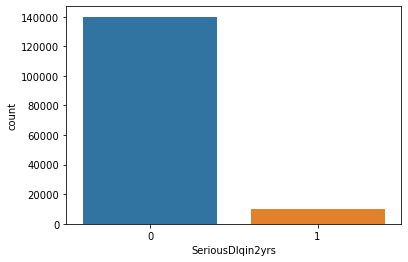

In [38]:
sns.countplot(data = train_df, x ='SeriousDlqin2yrs')

###### Data is imbalanced, so first of all balance the data using SMOTE 

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
X = train_df.drop(['SeriousDlqin2yrs'], axis = 1)
y = train_df[['SeriousDlqin2yrs']]

In [41]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

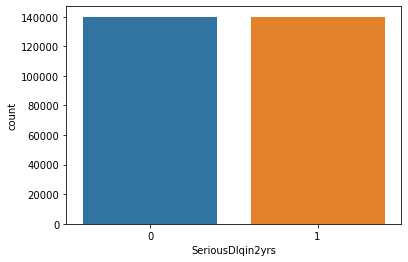

In [42]:
sns.countplot(data = y_res, x ='SeriousDlqin2yrs')

In [43]:
y_res['SeriousDlqin2yrs'].value_counts()

1    139974
0    139974
Name: SeriousDlqin2yrs, dtype: int64

In [44]:
# Join X_res and y_res dataframes and create the balanced dataframe
bal_df = pd.concat([X_res, y_res], axis=1)

In [45]:
bal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279948 entries, 0 to 279947
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  279948 non-null  float64
 1   age                                   279948 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  279948 non-null  int64  
 3   DebtRatio                             279948 non-null  float64
 4   MonthlyIncome                         279948 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       279948 non-null  int64  
 6   NumberOfTimes90DaysLate               279948 non-null  int64  
 7   NumberRealEstateLoansOrLines          279948 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  279948 non-null  int64  
 9   NumberOfDependents                    279948 non-null  float64
 10  SeriousDlqin2yrs                      279948 non-null  int64  
dtype

In [46]:
bal_df['RevolvingUtilizationOfUnsecuredLines'].value_counts()

1.000000    19084
0.000000    11054
1.000000       17
0.950100        8
0.954092        6
            ...  
0.021993        1
0.675681        1
0.259599        1
0.860242        1
0.323180        1
Name: RevolvingUtilizationOfUnsecuredLines, Length: 246672, dtype: int64

In [47]:
bal_df['age'].value_counts()

46     8057
48     7953
47     7944
49     7942
50     7883
       ... 
102       3
109       2
107       1
105       1
0         1
Name: age, Length: 86, dtype: int64

In [48]:
train_df['age'].value_counts()

49     3837
48     3806
50     3753
47     3719
63     3719
       ... 
102       3
109       2
107       1
105       1
0         1
Name: age, Length: 86, dtype: int64

In [49]:
bal_df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     204353
1      46167
2      16697
3       6473
4       2622
       ...  
88         1
84         1
42         1
39         1
64         1
Name: NumberOfTime30-59DaysPastDueNotWorse, Length: 83, dtype: int64

In [50]:
train_df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [51]:
# MonthlyIncome
# NumberOfOpenCreditLinesAndLoans
# NumberOfTimes90DaysLate 
# NumberRealEstateLoansOrLines 
# NumberOfTime60-89DaysPastDueNotWorse
# NumberOfDependents
bal_df['DebtRatio'].value_counts()

0.000000    6137
1.000000     229
4.000000     184
3.000000     180
2.000000     170
            ... 
0.245291       1
0.327506       1
0.199450       1
0.140077       1
0.323089       1
Name: DebtRatio, Length: 241135, dtype: int64

In [52]:
# NumberOfOpenCreditLinesAndLoans
# NumberOfTimes90DaysLate 
# NumberRealEstateLoansOrLines 
# NumberOfTime60-89DaysPastDueNotWorse
# NumberOfDependents
bal_df['MonthlyIncome'].value_counts()

6670.221237    51444
5000.000000     4819
4000.000000     4186
3000.000000     3815
6000.000000     3628
               ...  
3251.305361        1
7545.467472        1
3439.911881        1
6541.946730        1
2189.928319        1
Name: MonthlyIncome, Length: 67372, dtype: int64

In [53]:
# NumberOfTimes90DaysLate 
# NumberRealEstateLoansOrLines 
# NumberOfTime60-89DaysPastDueNotWorse
# NumberOfDependents
bal_df['NumberOfOpenCreditLinesAndLoans'].value_counts()

5     24554
6     24472
7     23437
4     22483
8     22015
9     20030
3     18910
10    17168
2     14840
11    14746
12    12138
1     11590
13     9853
14     8038
0      7534
15     6348
16     5106
17     3861
18     2976
19     2301
20     1813
21     1368
22      992
23      798
24      574
25      458
26      330
27      257
28      204
29      144
30      111
31      101
32       77
33       67
34       43
35       36
36       28
40       17
38       15
37       13
39       12
42       11
43       11
45       11
49        7
41        7
46        7
44        7
48        6
54        5
52        3
56        3
47        3
50        3
57        2
51        2
58        1
53        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

In [54]:
train_df['NumberOfOpenCreditLinesAndLoans'].value_counts()

6     13614
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
42        8
45        8
43        8
37        7
48        6
49        4
54        4
41        4
52        3
46        3
57        2
51        2
56        2
47        2
50        2
44        2
58        1
53        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

In [55]:
# NumberRealEstateLoansOrLines 
# NumberOfTime60-89DaysPastDueNotWorse
# NumberOfDependents
bal_df['NumberOfTimes90DaysLate'].value_counts()

0     240080
1      23796
2       8234
3       3264
98      1934
       ...  
38         1
81         1
44         1
64         1
79         1
Name: NumberOfTimes90DaysLate, Length: 81, dtype: int64

In [56]:
train_df['NumberOfTimes90DaysLate'].value_counts()

0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [57]:
# NumberOfTime60-89DaysPastDueNotWorse
# NumberOfDependents
bal_df['NumberRealEstateLoansOrLines'].value_counts()

0     128563
1      89813
2      45392
3       9678
4       3503
5       1304
6        666
7        389
8        196
9        142
10        80
11        69
12        43
13        29
14        20
15        13
18         8
19         7
17         5
23         4
20         4
25         4
16         4
21         4
24         2
29         1
54         1
26         1
32         1
28         1
22         1
Name: NumberRealEstateLoansOrLines, dtype: int64

In [58]:
# NumberOfDependents
bal_df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

0     252747
1      19807
2       3835
98      1934
3        941
       ...  
54         1
72         1
91         1
83         1
79         1
Name: NumberOfTime60-89DaysPastDueNotWorse, Length: 84, dtype: int64

In [59]:
bal_df['NumberOfDependents'].value_counts()

0.000000    132045
1.000000     31607
2.000000     23898
3.000000     10761
4.000000      3063
             ...  
0.865545         1
0.097942         1
1.286326         1
0.568350         1
2.767661         1
Name: NumberOfDependents, Length: 77580, dtype: int64

In [60]:
train_df['NumberOfDependents'].value_counts()

0.0     90826
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: NumberOfDependents, dtype: int64

In [61]:
bal_df['NumberOfDependents'] = bal_df['NumberOfDependents'].astype(int)

In [62]:
bal_df['NumberOfDependents'].value_counts()

0     168319
1      56145
2      36234
3      14353
4       3676
5        903
6        217
7         65
8         24
10         5
9          5
20         1
13         1
Name: NumberOfDependents, dtype: int64

In [63]:
bal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279948 entries, 0 to 279947
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  279948 non-null  float64
 1   age                                   279948 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  279948 non-null  int64  
 3   DebtRatio                             279948 non-null  float64
 4   MonthlyIncome                         279948 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       279948 non-null  int64  
 6   NumberOfTimes90DaysLate               279948 non-null  int64  
 7   NumberRealEstateLoansOrLines          279948 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  279948 non-null  int64  
 9   NumberOfDependents                    279948 non-null  int32  
 10  SeriousDlqin2yrs                      279948 non-null  int64  
dtype

#### Gaining the insights

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

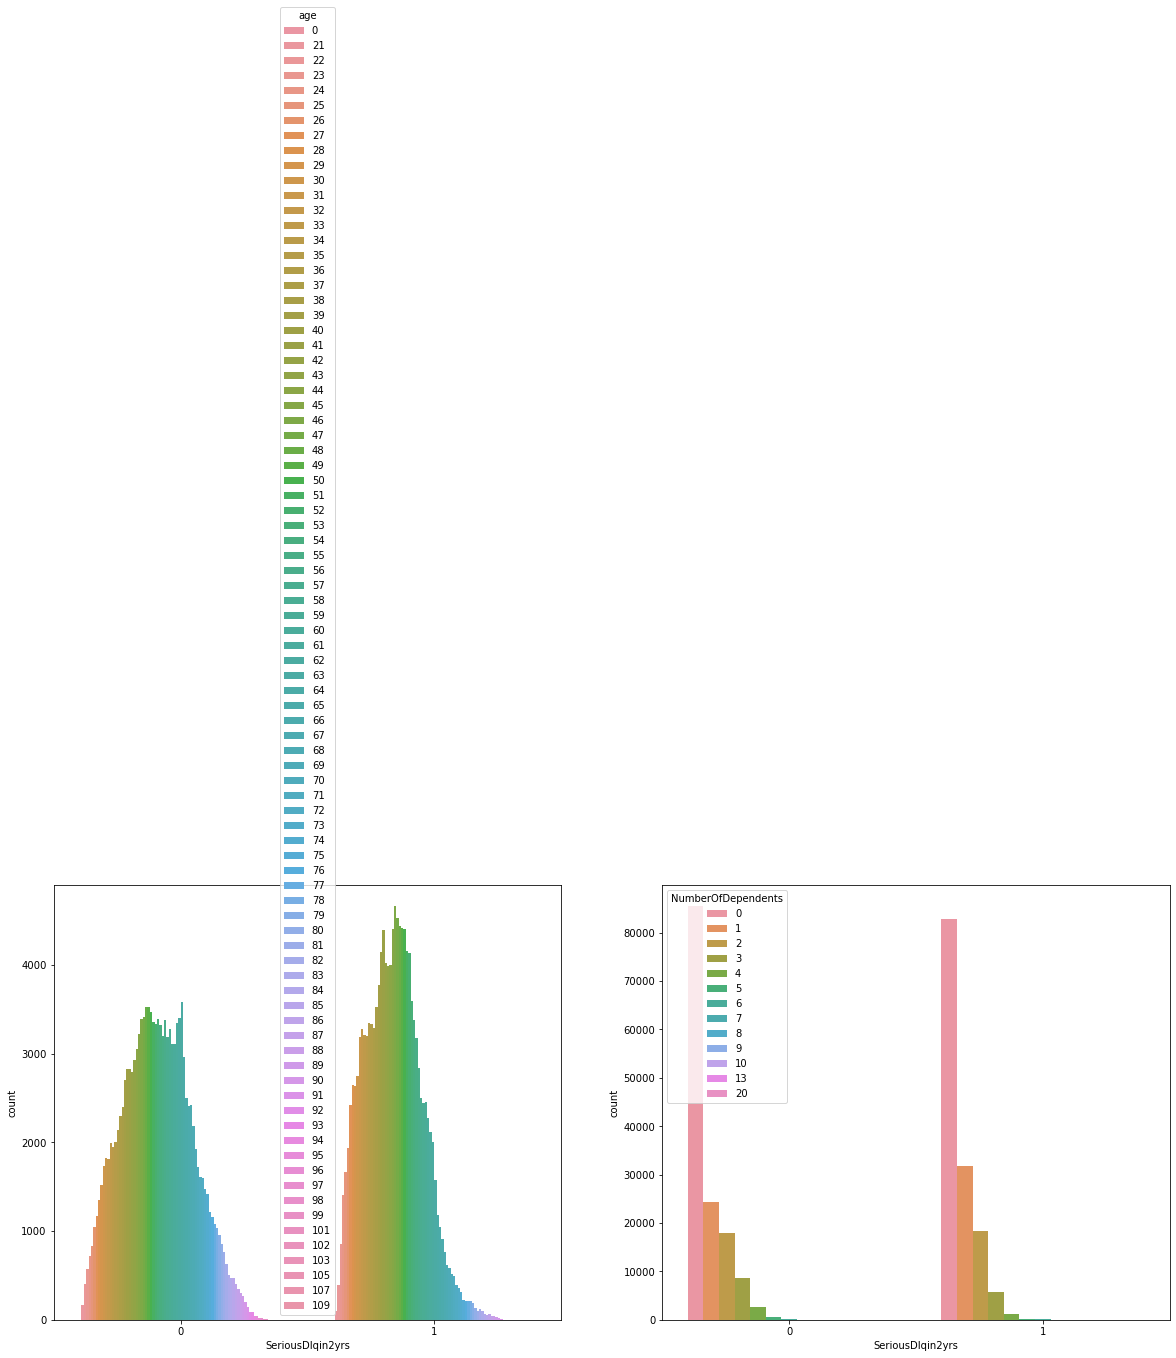

In [64]:
fig, ax = plt.subplots(1,2, figsize = (20,8))
sns.countplot(data = bal_df, x = 'SeriousDlqin2yrs', hue = bal_df['age'], ax = ax[0])
sns.countplot(data = bal_df, x = 'SeriousDlqin2yrs', hue = bal_df['NumberOfDependents'], ax = ax[1])

###### No. of dependents does not have any impact

### Correlation check

<AxesSubplot:>

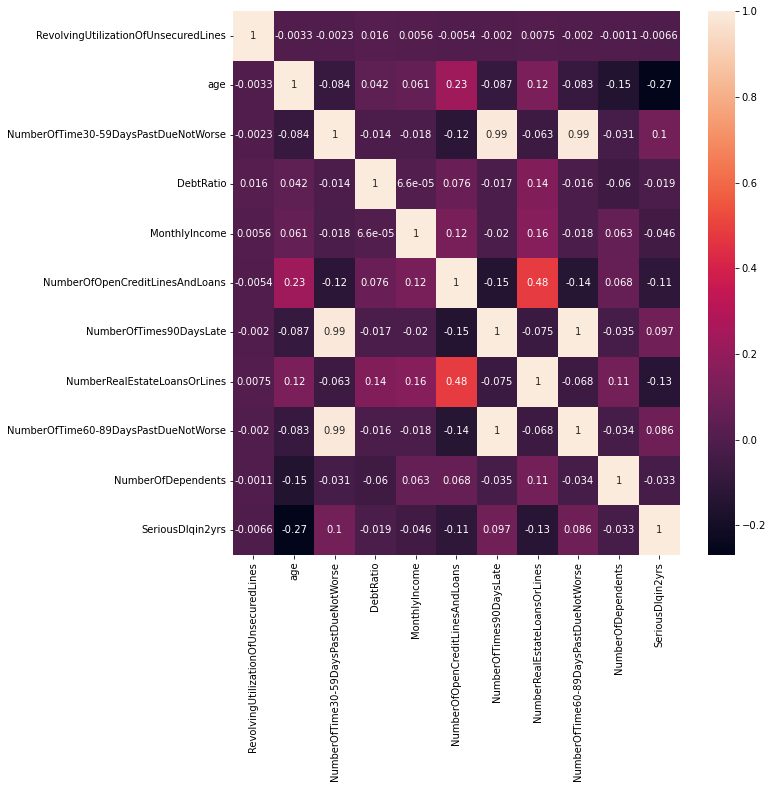

In [65]:
fig, ax = plt.subplots (figsize= (10,10))
sns.heatmap(bal_df.corr(), annot = True)

###### age, NumberOfTime30-59DaysPastDueNotWorse, NumberRealEstateLoansOrLines are correlated with SeriousDlqin2yrs

###### Multicollinearity exists between:
- `NumberOfTime30-59DaysPastDueNotWorse` and `NumberOfTime60-59DaysPastDueNotWorse` and `NumberOfTimes90DaysLate`\
- `NumberOfTime30-59DaysPastDueNotWorse` is highly correlated with `SeriousDlqin2yrs` hence `NumberOfTime60-59DaysPastDueNotWorse` and `NumberOfTimes90DaysLate`could be dropped

### Outliers check

In [66]:
bal_df.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs'],
      dtype='object')

<AxesSubplot:xlabel='age'>

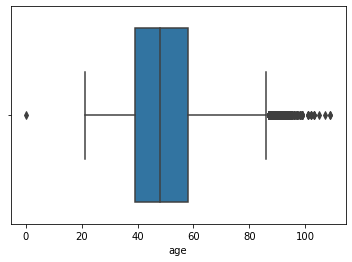

In [67]:
sns.boxplot(bal_df['age'])

In [68]:
# function that will return the lowerbound and upperbound values
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [69]:
# Using the above function, lets get the lowerbound and upperbound values
lowerbound,upperbound = outlier_treatment(bal_df['age'])

In [70]:
# check which column is considered as an outlier
bal_df[(bal_df['age'] < lowerbound) | (bal_df['age'] > upperbound)]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
208,0.046640,92,1,0.034327,2650.000000,13,0,0,0,0,0
320,0.016478,92,0,10.000000,6670.221237,3,0,0,0,0,0
336,0.053589,87,0,0.001534,5213.000000,4,0,0,0,0,0
387,0.003895,90,0,876.000000,6670.221237,11,0,1,0,0,0
436,0.007000,97,0,3.000000,6670.221237,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
275633,0.623461,88,1,0.407393,2500.000000,6,1,0,0,0,1
275660,0.542080,90,1,0.233194,6500.000000,12,0,0,1,0,1
276744,0.579000,88,1,0.429625,2500.000000,6,1,0,0,0,1
277208,0.800686,89,4,0.440255,2390.322198,4,0,0,2,0,1


In [71]:
#Now lets remove the outliers from the dataset.
bal_df.drop(bal_df[ (bal_df['age'] > upperbound) | (bal_df['age'] < lowerbound) ].index , inplace=True)

In [72]:
bal_df[(bal_df['age'] < lowerbound) | (bal_df['age'] > upperbound)]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs


<AxesSubplot:xlabel='RevolvingUtilizationOfUnsecuredLines'>

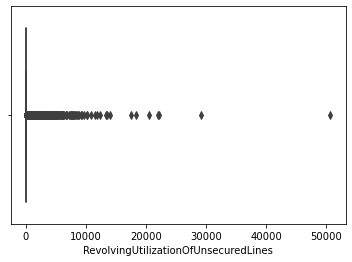

In [73]:
sns.boxplot(bal_df['RevolvingUtilizationOfUnsecuredLines'])

In [74]:
# Using the above function, lets get the lowerbound and upperbound values
lowerbound,upperbound = outlier_treatment(bal_df['RevolvingUtilizationOfUnsecuredLines'])
# check which column is considered as an outlier
bal_df[(bal_df['RevolvingUtilizationOfUnsecuredLines'] < lowerbound) | (bal_df['RevolvingUtilizationOfUnsecuredLines'] > upperbound)]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
293,2340.000000,45,0,0.339333,8333.000000,7,0,2,0,2,0
697,2066.000000,58,0,0.271121,6000.000000,8,1,1,0,1,1
900,2.258964,33,2,0.032484,2000.000000,1,1,0,0,2,0
1991,1143.000000,44,2,0.547762,6500.000000,13,0,4,0,2,1
2331,6324.000000,59,0,0.136673,11318.000000,4,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
278441,3613.025964,42,0,1012.970574,6005.975615,6,2,1,0,0,1
278734,7.265225,53,1,0.157145,3750.000000,4,1,0,0,1,1
278925,4.179024,47,1,0.403553,3719.878173,3,0,0,2,2,1
279027,2.877930,55,0,0.232371,4000.000000,5,0,0,0,2,1


In [75]:
#Now lets remove the outliers from the dataset.
bal_df.drop(bal_df[ (bal_df['RevolvingUtilizationOfUnsecuredLines'] > upperbound) | (bal_df['RevolvingUtilizationOfUnsecuredLines'] < lowerbound) ].index , inplace=True)
# check which column is considered as an outlier
bal_df[(bal_df['RevolvingUtilizationOfUnsecuredLines'] < lowerbound) | (bal_df['RevolvingUtilizationOfUnsecuredLines'] > upperbound)]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs


<AxesSubplot:xlabel='NumberOfTime30-59DaysPastDueNotWorse'>

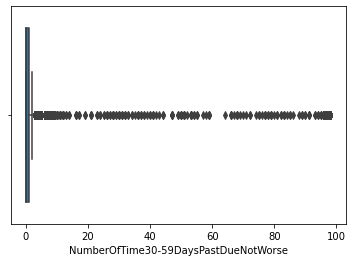

In [76]:
sns.boxplot(bal_df['NumberOfTime30-59DaysPastDueNotWorse'])

In [77]:
# Using the above function, lets get the lowerbound and upperbound values
lowerbound,upperbound = outlier_treatment(bal_df['NumberOfTime30-59DaysPastDueNotWorse'])
# check which column is considered as an outlier
bal_df[(bal_df['NumberOfTime30-59DaysPastDueNotWorse'] < lowerbound) | (bal_df['NumberOfTime30-59DaysPastDueNotWorse'] > upperbound)]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
13,0.964673,40,3,0.382965,13700.000000,9,3,1,1,2,1
36,0.881836,50,3,0.567858,4000.000000,9,0,1,0,1,0
183,0.184987,55,4,3144.000000,6670.221237,11,0,1,0,0,0
191,1.095083,53,5,0.536704,3500.000000,7,1,1,2,0,0
196,0.762159,44,4,0.224466,21000.000000,5,0,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
279904,0.314307,33,3,0.505223,5700.000000,5,0,2,0,3,1
279915,0.685749,59,3,7166.984416,6670.221237,22,0,3,0,0,1
279941,1.000000,59,98,0.000000,6670.221237,0,98,0,98,0,1
279943,1.000000,27,98,0.000000,1515.691686,0,98,0,98,0,1


In [78]:
#Now lets remove the outliers from the dataset.
bal_df.drop(bal_df[ (bal_df['NumberOfTime30-59DaysPastDueNotWorse'] > upperbound) | (bal_df['NumberOfTime30-59DaysPastDueNotWorse'] < lowerbound) ].index , inplace=True)
# check which column is considered as an outlier
bal_df[(bal_df['NumberOfTime30-59DaysPastDueNotWorse'] < lowerbound) | (bal_df['NumberOfTime30-59DaysPastDueNotWorse'] > upperbound)]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs


<AxesSubplot:xlabel='DebtRatio'>

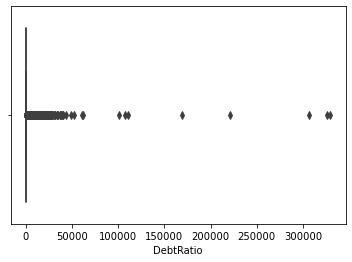

In [79]:
sns.boxplot(bal_df['DebtRatio'])

In [80]:
# Using the above function, lets get the lowerbound and upperbound values
lowerbound,upperbound = outlier_treatment(bal_df['DebtRatio'])
# check which column is considered as an outlier
bal_df[(bal_df['DebtRatio'] < lowerbound) | (bal_df['DebtRatio'] > upperbound)]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
6,0.305682,57,0,5710.000000,6670.221237,8,0,3,0,0,0
8,0.116951,27,0,46.000000,6670.221237,2,0,0,0,0,0
14,0.019657,76,0,477.000000,0.000000,6,0,1,0,0,0
16,0.061086,78,0,2058.000000,6670.221237,10,0,2,0,0,0
32,0.083418,62,0,977.000000,6670.221237,6,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
279919,0.864989,77,0,186.288652,6670.221237,3,0,0,0,0,1
279932,0.549831,41,0,4023.733037,6670.221237,10,0,1,0,0,1
279937,0.016195,41,0,1060.975360,6670.221237,3,0,1,0,1,1
279945,0.412629,28,0,963.687584,6670.221237,12,0,0,0,0,1


In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scalar= StandardScaler()
scaled_df= scalar.fit_transform(bal_df)
scaled_df=pd.DataFrame(scaled_df,columns=bal_df.columns)
scaled_df.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.725147,-0.281296,2.939266,-0.190415,0.276703,1.008171,-0.305164,4.554321,-0.262103,1.275126,1.028755
1,1.218251,-0.646005,-0.516259,-0.190818,-0.359278,-0.774371,-0.305164,-0.775977,-0.262103,0.300021,-0.972049
2,0.446498,-0.791888,1.211504,-0.190840,-0.316164,-1.170492,1.141700,-0.775977,-0.262103,-0.675084,-0.972049
3,-0.648957,-1.375422,-0.516259,-0.190869,-0.290998,-0.576311,-0.305164,-0.775977,-0.262103,-0.675084,-0.972049
4,1.089411,0.010471,1.211504,-0.190875,5.589688,-0.180191,-0.305164,0.112406,-0.262103,-0.675084,-0.972049


In [83]:
#apply various classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [84]:
U= bal_df.drop(['SeriousDlqin2yrs'], axis = 1)
V = bal_df[['SeriousDlqin2yrs']]

In [85]:
#Splitting into train and test data
x_train,x_test,y_train,y_test=train_test_split(U,V, test_size=0.3,random_state=1)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(185266, 10) (79401, 10) (185266, 1) (79401, 1)


# Application of Algorithms

## Logistic Regression

In [90]:
#Logistic regression Model
log_regressor= LogisticRegression()
log_reg=log_regressor.fit(x_train,y_train)
y_pred_log=log_reg.predict(x_test)
y_pred_train_log=log_reg.predict(x_train)
y_pred_log

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [93]:
#Evauluating the accuracy score of the models
log_reg_train_acc=accuracy_score(y_train,y_pred_train_log)
log_reg_test_acc=accuracy_score(y_test,y_pred_log)
print("training accuracy using logistic regression is :",log_reg_train_acc)
print("testing accuracy logistic regression is :", log_reg_test_acc)

training accuracy using logistic regression is : 0.7417011216305205
testing accuracy logistic regression is : 0.7424843515824737


In [94]:
#evaluating the classification report of the model
log_reg_cls_rpt=classification_report(y_test,y_pred_log)
print(log_reg_cls_rpt)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     41097
           1       0.75      0.70      0.72     38304

    accuracy                           0.74     79401
   macro avg       0.74      0.74      0.74     79401
weighted avg       0.74      0.74      0.74     79401



logistic regreesion model ROC-AUC score: 0.7409645929143246


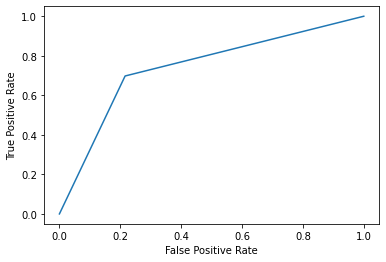

In [95]:
# ROC AUC curve for logistic regression
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(f'logistic regreesion model ROC-AUC score: {roc_auc_score(y_test, y_pred_log)}')

## Decision Tree 

In [96]:
#Decision Tree Classifier Model
dt_classfier=DecisionTreeClassifier()
dt_cls=dt_classfier.fit(x_train,y_train)
y_pred_train_dt=dt_cls.predict(x_train)
y_pred_dt=dt_cls.predict(x_test)
print("Y train prediction using decision tree is :",y_pred_train_dt)
print("Y test prediction using decision tree is :",y_pred_dt)

Y train prediction using decision tree is : [0 0 0 ... 0 0 1]
Y test prediction using decision tree is : [0 1 0 ... 0 0 0]


In [97]:
#decision tree classfier accuracy score
dt_cls_train_acc=accuracy_score(y_train,y_pred_train_dt)
dt_cls_test_acc=accuracy_score(y_test,y_pred_dt)
print("training accuracy using  decision tree is :",dt_cls_train_acc)
print("testing accuracy using  decision tree is :", dt_cls_test_acc)

training accuracy using  decision tree is : 0.9994224520419289
testing accuracy using  decision tree is : 0.7929119280613595


In [98]:
#decision tree classifier classification report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80     41097
           1       0.77      0.81      0.79     38304

    accuracy                           0.79     79401
   macro avg       0.79      0.79      0.79     79401
weighted avg       0.79      0.79      0.79     79401



decision tree model ROC-AUC score: 0.7934755223414522


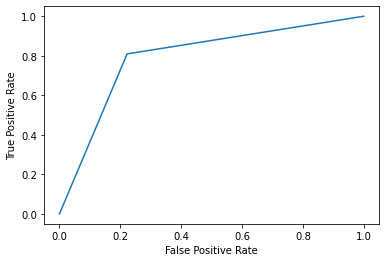

In [99]:
# ROC AUC curve for decision tree
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(f'decision tree model ROC-AUC score: {roc_auc_score(y_test, y_pred_dt)}')

## Random Forest

In [100]:
# Random forest classfier model
rf_classfier= RandomForestClassifier()
rf_cls= rf_classfier.fit(x_train,y_train)
y_pred_train_rf=rf_cls.predict(x_train)
y_pred_rf=rf_cls.predict(x_test)
print("Y train prediction using random forest is :",y_pred_train_rf)
print("Y test prediction using random forest is :",y_pred_rf)

Y train prediction using random forest is : [0 0 0 ... 0 0 1]
Y test prediction using random forest is : [0 0 0 ... 0 0 0]


In [101]:
#Random forest classifier accuracy score
rf_cls_train_acc=accuracy_score(y_train,y_pred_train_rf)
rf_cls_test_acc=accuracy_score(y_test,y_pred_rf)
print("training accuracy using  decision tree is :",rf_cls_train_acc)
print("testing accuracy using  decision tree is :", rf_cls_test_acc)

training accuracy using  decision tree is : 0.999400861464057
testing accuracy using  decision tree is : 0.8577347892343925


In [102]:
#Random forest classifier Classification report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     41097
           1       0.83      0.89      0.86     38304

    accuracy                           0.86     79401
   macro avg       0.86      0.86      0.86     79401
weighted avg       0.86      0.86      0.86     79401



random forest model ROC-AUC score: 0.8586993880331898


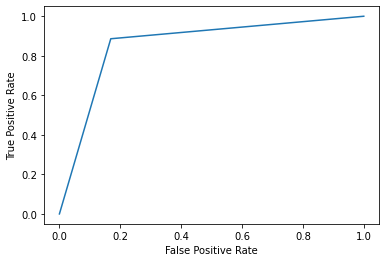

In [103]:
# ROC AUC curve for random forest
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(f'random forest model ROC-AUC score: {roc_auc_score(y_test, y_pred_rf)}')

## K Nearest Neighbour

In [104]:
# KNN classfier model
knn_classfier= KNeighborsClassifier()
knn_cls= knn_classfier.fit(x_train,y_train)
y_pred_train_knn=knn_cls.predict(x_train)
y_pred_knn=knn_cls.predict(x_test)
print("Y train prediction using K nearest neighbour is :",y_pred_train_knn)
print("Y test prediction using K nearest neighbour is :",y_pred_knn)

Y train prediction using K nearest neighbour is : [0 0 1 ... 0 0 1]
Y test prediction using K nearest neighbour is : [0 0 0 ... 1 0 0]


In [105]:
#KNN classifier accuracy score
knn_cls_train_acc=accuracy_score(y_train,y_pred_train_knn)
knn_cls_test_acc=accuracy_score(y_test,y_pred_knn)
print("training accuracy using K nearest neighbour is :",knn_cls_train_acc)
print("testing accuracy using K nearest neighbour is :",knn_cls_test_acc)

training accuracy using K nearest neighbour is : 0.8880474560901622
testing accuracy using K nearest neighbour is : 0.8333396304832433


In [106]:
#KNN classifier Classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.75      0.82     41097
           1       0.77      0.93      0.84     38304

    accuracy                           0.83     79401
   macro avg       0.84      0.84      0.83     79401
weighted avg       0.85      0.83      0.83     79401



K nearest neighbour model ROC-AUC score: 0.8365561456229571


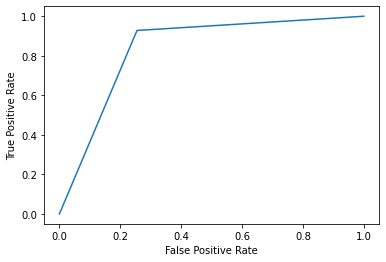

In [107]:
# ROC AUC curve for decision tree
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
print(f'K nearest neighbour model ROC-AUC score: {roc_auc_score(y_test, y_pred_knn)}')

# Evaluated scores

## Accuracy scores of the algorithms used

In [108]:
print("Accuracy score using logistic regression algorithm is: ", log_reg_test_acc)
print("Accuracy score using decision tree algorithm is: ", dt_cls_test_acc)
print("Accuracy score using random forest algorithm is: ",rf_cls_test_acc)
print("Accuracy score using kn nearest neighbour algorithm is: ",knn_cls_test_acc)

Accuracy score using logistic regression algorithm is:  0.7424843515824737
Accuracy score using decision tree algorithm is:  0.7929119280613595
Accuracy score using random forest algorithm is:  0.8577347892343925
Accuracy score using kn nearest neighbour algorithm is:  0.8333396304832433


## ROC-AUC scores of the algorithms used

In [109]:
print(f'logistic regression model ROC-AUC score is: {roc_auc_score(y_test, y_pred_log)}')
print(f'decision tree model ROC-AUC score is: {roc_auc_score(y_test, y_pred_dt)}')
print(f'random forest model ROC-AUC score is: {roc_auc_score(y_test, y_pred_rf)}')
print(f'K nearest neighbour model ROC-AUC score is: {roc_auc_score(y_test, y_pred_knn)}')

logistic regression model ROC-AUC score is: 0.7409645929143246
decision tree model ROC-AUC score is: 0.7934755223414522
random forest model ROC-AUC score is: 0.8586993880331898
K nearest neighbour model ROC-AUC score is: 0.8365561456229571


## Confusion Matrix of the algorithms used

In [110]:
print("Confusion Matrix using logistic regression is :\n", confusion_matrix(y_test, y_pred_log))
print("Confusion Matrix using decision tree is :\n", confusion_matrix(y_test, y_pred_dt))
print("Confusion Matrix using random forest is :\n", confusion_matrix(y_test, y_pred_rf))
print("Confusion Matrix using K nearest neighbour is :\n", confusion_matrix(y_test, y_pred_knn))

Confusion Matrix using logistic regression is :
 [[32227  8870]
 [11577 26727]]
Confusion Matrix using decision tree is :
 [[31951  9146]
 [ 7297 31007]]
Confusion Matrix using random forest is :
 [[34163  6934]
 [ 4362 33942]]
Confusion Matrix using K nearest neighbour is :
 [[30622 10475]
 [ 2758 35546]]


# 1 Testing test data 

In [111]:
scalar= StandardScaler()
scaled_df= scalar.fit_transform(test_df)
scaled_df=pd.DataFrame(scaled_df,columns=test_df.columns)
scaled_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,-0.022556,-0.636376,-0.099983,-0.210891,-0.035329,-0.865756,-0.0657,-0.912475,-0.060023,-0.663791
1,NaN,-0.024709,0.310870,-0.099983,-0.210677,0.069920,1.272627,-0.0657,2.690325,-0.060023,1.108326
2,NaN,-0.026850,0.446191,-0.099983,-0.210578,-0.054201,0.689431,-0.0657,-0.011775,-0.060023,1.108326
3,NaN,-0.025641,-0.974678,0.120356,-0.210432,-0.111796,-0.282561,-0.0657,0.888925,-0.060023,-0.663791
4,NaN,-0.021972,-1.718943,-0.099983,-0.210987,-0.091456,-0.865756,-0.0657,-0.912475,-0.060023,0.222267


In [112]:
H= test_df.drop(['SeriousDlqin2yrs'], axis = 1)
I = test_df[['SeriousDlqin2yrs']]

In [113]:
y_pred_r=rf_cls.predict(H)
print("Y  prediction using random forest is :",y_pred_r)

Y  prediction using random forest is : [1 0 0 ... 0 0 0]


In [114]:
Serie=pd.DataFrame(y_pred_r)
Serie

,0
0,1
1,0
2,0
3,0
4,0
...,...
101498,1
101499,0
101500,0
101501,0


In [115]:

df2 = pd.concat([H,Serie], axis=1)
#display(df2)
df2.to_csv('final_prediction.csv')